# keras数据集

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test = x_train/255,x_test/255

In [2]:
#标准手写的训练集合，有6万张图片，每张图片为28像素*28像素的
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

#拆分训练结合一部分为验证集合
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]

print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)


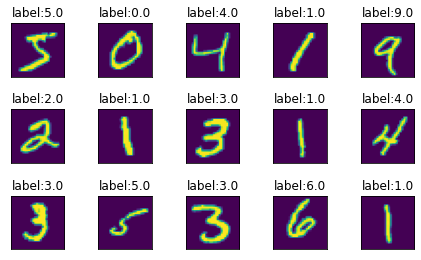

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()

for i in range(15):
    # 每行3个，共计五行，按顺序放手写图片
    plt.subplot(3,5,i+1)
    #自动适配图片尺寸
    plt.tight_layout() 
    plt.imshow(x_train[i])
    plt.title("label:{}".format(y_train[i]))
    #坐标轴设置
    plt.xticks([])
    plt.yticks([])

In [6]:
!pip install graphviz pydot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 369.7 kB/s eta 0:00:00a 0:00:01


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #28 * 28像素
    tf.keras.layers.Dense(128,activation="ReLU"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,"Softmax") #只有10个数字，最后激活分类需要10个神经元
])

# tf.keras.utils.plot_mode(model,"mnist._model.png")


In [22]:
model.summary()

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
# 模型迭代5轮
model.fit(x_train,y_train,epochs=5)

model.evaluate(x_val,y_val)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   7/1563 [..............................] - ETA: 16s - loss: 2.2083 - accuracy: 0.2277 

2022-06-04 20:57:47.842207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 7s 5ms/step - loss: 0.3116 - accuracy: 0.9100
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1486 - accuracy: 0.9554
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1062 - accuracy: 0.9681
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0863 - accuracy: 0.9737
Epoch 5/5
 43/313 [===>..........................] - ETA: 0s - loss: 0.0879 - accuracy: 0.9688

2022-06-04 20:58:22.717353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.0815 - accuracy: 0.9749


[0.08154381811618805, 0.9749000668525696]

In [2]:
model.save("mnist_model")

NameError: name 'model' is not defined

In [6]:
sm = tf.keras.models.load_model("mnist_model")

In [7]:
sm.evaluate(x_val,y_val)

NameError: name 'x_val' is not defined

313/313 [==============================] - 1s 2ms/step
[9.9976474e-01 1.4894424e-08 1.6306524e-04 3.1212431e-07 1.9953786e-06
 3.2637359e-07 1.7916558e-05 4.4570475e-06 3.4401128e-07 4.6786234e-05]
预测： 0
0.0


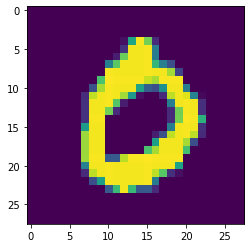

In [29]:

fig = plt.figure()
plt.imshow(x_test[3])
predictions = sm.predict(x_test)
import numpy as np
print(predictions[3])
print("预测：",np.argmax(predictions[3])) # np.argmax(predictions[3]) 概率最大的标签列
print(y_test[3])